<a href="https://colab.research.google.com/github/msymhkr/mainopen/blob/main/Conv2D_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_norm = x_train.astype('float')/255
x_test_norm = x_test.astype('float')/255
y_train_onehot = utils.to_categorical(y_train, 10)
y_test_onehot = utils.to_categorical(y_test, 10)

cnn = Sequential()
cnn.add(Conv2D(filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(32,32,3)))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=1))

cnn.add(Conv2D(filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=1))

cnn.add(Flatten())
cnn.add(Dropout(0.25))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['acc'])

history = cnn.fit(x=x_train_norm,
          y=y_train_onehot,
          batch_size=128,
          epochs=20,
          validation_split=0.1,)

cnn.save('cifar10_save-1.h5')
#tf.keras.models.save_model(cnn,'/content/cifar10_save-2.h5')

#cnn.summary()
#print(cnn.get_weights())

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [14]:
from tensorflow.keras.models import load_model
old_cnn = load_model('cifar10_save-1.h5')

test_loss, test_val = cnn.evaluate(x_test_norm, y_test_onehot)
print('Test loss: ', test_loss)
print('Test acc: ', test_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.6923 - loss: 1.2392
Test loss:  1.2541457414627075
Test acc:  0.6917999982833862


In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,5))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.subplot(1, 2, 1)
plt.plot(history.history["acc"], label="Training accuracy")
plt.plot(history.history["val_acc"], label="Validation accuracy")
plt.legend(loc="upper left")
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1st batch prediction:  [9.0658327e-04 4.9408740e-05 1.7112927e-01 1.8774787e-01 2.5727528e-01
 1.7823254e-01 2.0024633e-01 5.8819581e-04 2.6371519e-03 1.1874462e-03]
[6]


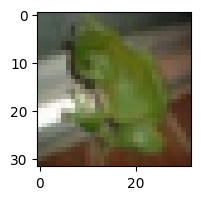

In [31]:
#print 1st prediction and image
from matplotlib import pyplot as plt

predict_prop = cnn.predict(x_test_norm)
print('1st batch prediction: ', predict_prop[7])

fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(x_test[7])
print(y_test[7])
plt.show()

In [23]:
#print first 10 predict and original labels
import numpy as np
print('First 10 Original labels: ', y_test[:10].reshape(10))

predict_class = (cnn.predict(x_test_norm) > 0.5).astype("int32")
print('First 10 predict labels: ', predict_class[:10])
y = []
for x in predict_class[:10]:
  x = x.tolist()
  try:
    x = x.index(1)
    print(x)
    y.append(x)
  except:
    x = x
    x = 'x'
    print(x)
    y.append(x)
    pass
print(f'Result list{y}')

First 10 Original labels:  [3 8 8 0 6 6 1 6 3 1]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
First 10 predict labels:  [[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
3
8
0
0
4
6
1
x
3
1
Result list[3, 8, 0, 0, 4, 6, 1, 'x', 3, 1]
